# Basic Time Series
---

[1. Data loading](#1)  
[2. Time series variable](#2)  
[3. Data split](#3)  
[4. Evaluation Metrics](#4)  
[5. Desiduals Diagnostics](#5)  

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 10
pd.options.display.max_columns = 25
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats


### Data loading
- Bike sharing demand Dataset
- https://www.kaggle.com/c/bike-sharing-demand/data

#### [Data Fields]
- datetime - hourly date + timestamp    
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter   
- holiday - whether the day is considered a holiday  
- workingday - whether the day is neither a weekend nor holiday
- weather
> 1) Clear, Few clouds, Partly cloudy, Partly cloudy<br>
> 2) Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
> 3) Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
> 4)Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog <br>
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [2]:
df = pd.read_csv('./Bike_Sharing_Demand_Full.csv')

In [3]:
display(df.head(3))
display(df.tail(3))
df.info()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
1,2011-01-01 1:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2,2011-01-01 2:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17376,2012-12-31 21:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90
17377,2012-12-31 22:00,1,0,1,1,10.66,13.63,56,9.00,13,48,61
17378,2012-12-31 23:00,1,0,1,1,10.66,13.63,65,9.00,12,37,49


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      17379 non-null  int64  
 10  registered  17379 non-null  int64  
 11  count       17379 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.6+ MB


In [4]:
df.datetime

0         2011-01-01 0:00
1         2011-01-01 1:00
2         2011-01-01 2:00
3         2011-01-01 3:00
4         2011-01-01 4:00
               ...       
17374    2012-12-31 19:00
17375    2012-12-31 20:00
17376    2012-12-31 21:00
17377    2012-12-31 22:00
17378    2012-12-31 23:00
Name: datetime, Length: 17379, dtype: object

In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   holiday     17379 non-null  int64         
 3   workingday  17379 non-null  int64         
 4   weather     17379 non-null  int64         
 5   temp        17379 non-null  float64       
 6   atemp       17379 non-null  float64       
 7   humidity    17379 non-null  int64         
 8   windspeed   17379 non-null  float64       
 9   casual      17379 non-null  int64         
 10  registered  17379 non-null  int64         
 11  count       17379 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.6 MB


In [6]:
df['Datetime'] = pd.to_datetime(df['datetime'])
df.set_index('Datetime', inplace=True)

In [7]:
df_raw = df.copy()
df_raw.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
Datetime,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1


## Time series variable  
- DateTime Index
- Period 변환: asfreq()
- null값 처리
- 시계열 분해: seasonal_decompose()
- 이동평균: MA
- Y 변화량: diff()
- 지연값: shift()

In [8]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
             ..
humidity      0
windspeed     0
casual        0
registered    0
count         0
Length: 12, dtype: int64

In [9]:
# asfreq() 'H' 기준으로 변환 
# H 기준 null 값 165 발생
df.asfreq('H').isnull().sum()

datetime      165
season        165
holiday       165
workingday    165
weather       165
             ... 
humidity      165
windspeed     165
casual        165
registered    165
count         165
Length: 12, dtype: int64

In [10]:
# forward fill 작업
df = df.asfreq('H', method='ffill')
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
             ..
humidity      0
windspeed     0
casual        0
registered    0
count         0
Length: 12, dtype: int64

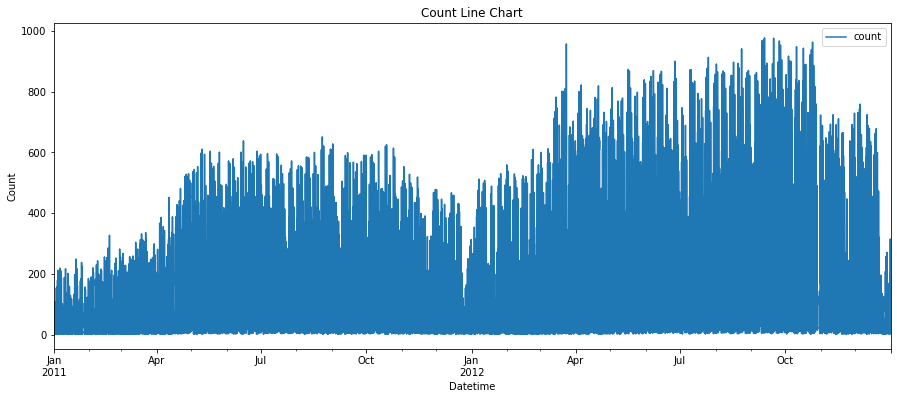

In [11]:
# Target trend graph
df[['count']].plot(kind='line', figsize=(15,6))
plt.title('Count Line Chart')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.show()

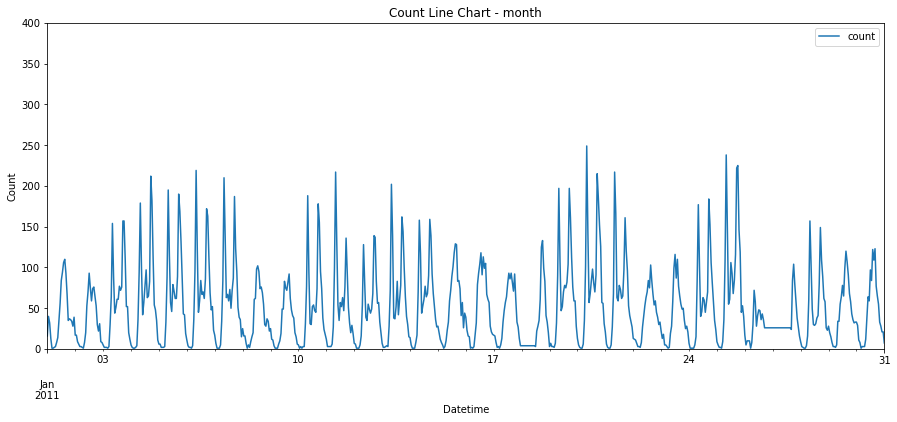

In [12]:
# Month trend
df[['count']].plot(kind='line', figsize=(15,6), xlim=('2011-01-01','2011-01-31'), ylim=(0,400))
plt.title('Count Line Chart - month')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.show()

### 시계열 분해 
- 시계열 데이터는 평균값, 추세, 계절성, 잔차로 구성됩
- 시계열 모델은 데이터가 정지해 있고 잔차 요소만 정상성 조건을 만족함
- Parmeter: __additive__, __multiplicative__
> 계절성 진폭이 평균에 의존적인가에 따라서 달라짐. 평균과 독립적인 경우 additive model, 평균에 따라 달라지면 multiplicative model 사용
<br>  

![](https://miro.medium.com/max/607/1*l3TW9hwiD-BFNOtRuSQD5w.png)

[source](https://towardsdatascience.com/time-series-decomposition-and-statsmodels-parameters-69e54d035453)  


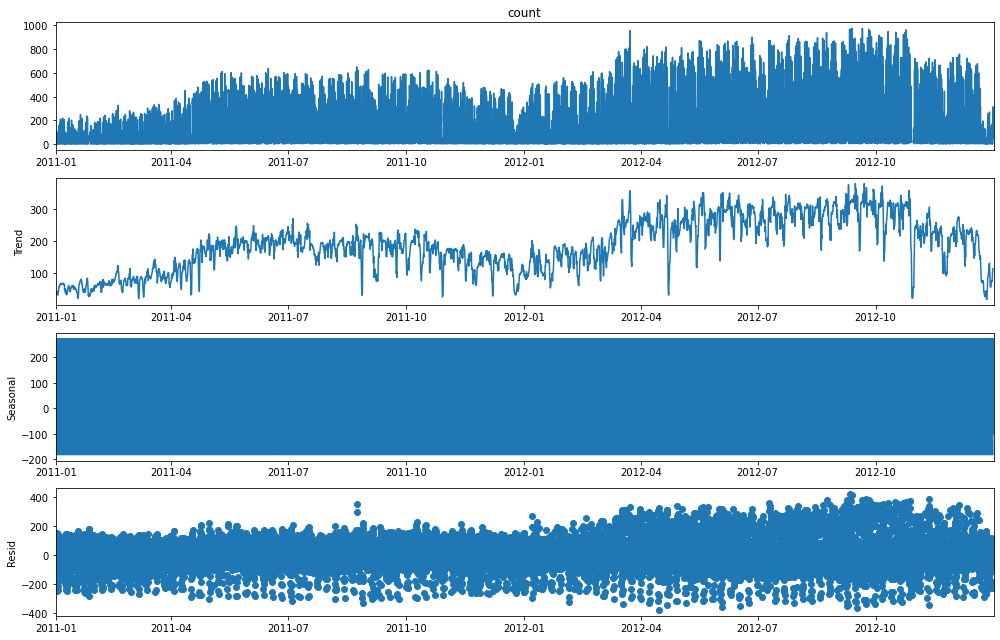

In [13]:
# 시계열 특성 추출(seasonal_decompose) - 'additive'
plt.rcParams['figure.figsize'] = (14, 9)
sm.tsa.seasonal_decompose(df['count'], model='additive').plot() # trend + seasonal + residual
plt.show()

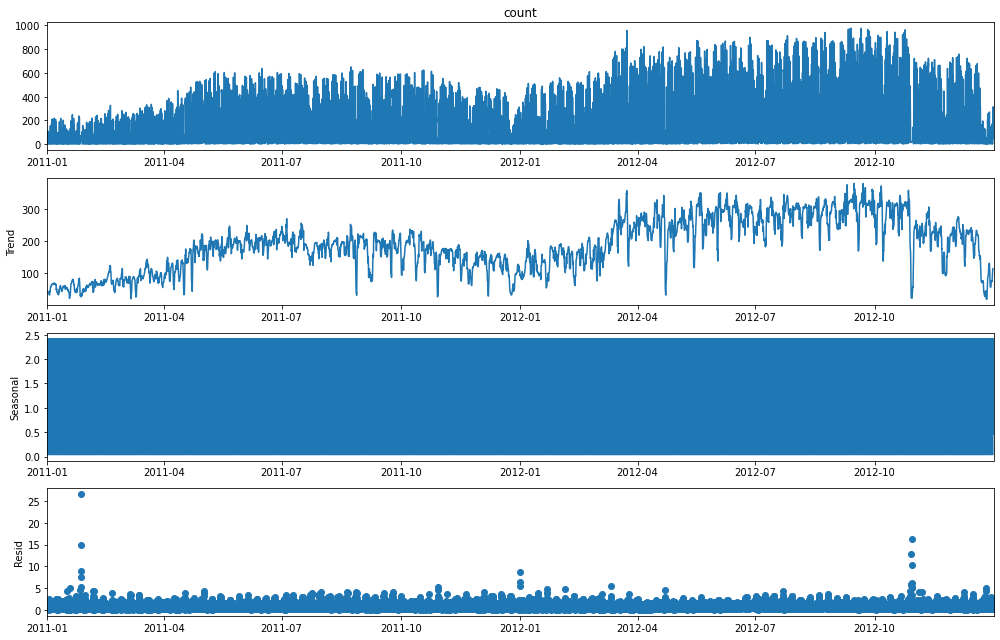

In [14]:
# 시계열 특성 추출(seasonal_decompose) - 'multiplicative'
plt.rcParams['figure.figsize'] = (14, 9)
sm.tsa.seasonal_decompose(df['count'], model='multiplicative').plot() # trend + seasonal + residual
plt.show()

In [15]:
# add time feature
sd = sm.tsa.seasonal_decompose(df['count'], model='additive')
Y_trend = pd.DataFrame(sd.trend)
Y_trend.fillna(method='ffill', inplace=True)
Y_trend.fillna(method='bfill', inplace=True)
Y_trend.columns = ['count_trend']

Y_seasonal = pd.DataFrame(sd.seasonal)
Y_seasonal.fillna(method='ffill', inplace=True)
Y_seasonal.fillna(method='bfill', inplace=True)
Y_seasonal.columns = ['count_seasonal']

df = pd.concat([df, Y_trend, Y_seasonal], axis=1)

### Moving Average
- noise를 제거하고 전체적인 추세를 확인하기 위한 작업
- 변동폭이 적은 추세선
- SMA, Simple Moving Average (가장 일반적이 방법, 일정 기간의 값를 합산 - MAD, MSE를 비교하여 예측오차가 작은 경우의 n 선택)
- Linear Weighted Average (특정 기간의 값을 모두 더해서 그 데이터 지점의 위치를 곱하고 기간의 합으로 나눔)
> (w1n1 + w2n2 + w3*n3) / (w1 + w2 + w3)
- EMA, Exponential Moving Average(SMA 보다 조금더 빨리 추세 적용)
> EMV(t) = (1-w) * ((1-w) * EMV(t-2) + w * Price(t-1)) + w * Price(t)

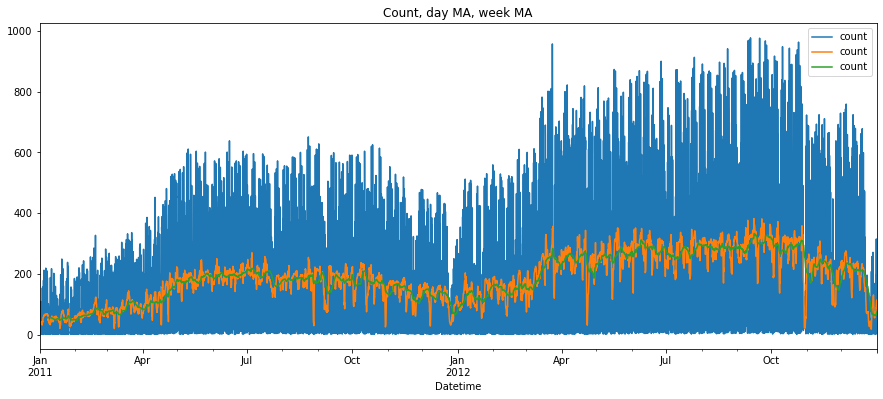

In [16]:
# Moving Average chart - sma
pd.concat([df['count'], df['count'].rolling(24).mean(), df['count'].rolling(24*7).mean()], axis=1).plot(kind='line', figsize=(15,6))
plt.title('Count, day MA, week MA')
plt.show()


In [17]:
# MA feature
Y_count_Day = df[['count']].rolling(24).mean()
Y_count_Day.fillna(method='ffill', inplace=True)
Y_count_Day.fillna(method='bfill', inplace=True)
Y_count_Day.columns = ['count_Day']
Y_count_Week = df[['count']].rolling(24*7).mean()
Y_count_Week.fillna(method='ffill', inplace=True)
Y_count_Week.fillna(method='bfill', inplace=True)
Y_count_Week.columns = ['count_Week']

df = pd.concat([df, Y_count_Day, Y_count_Week], axis=1)

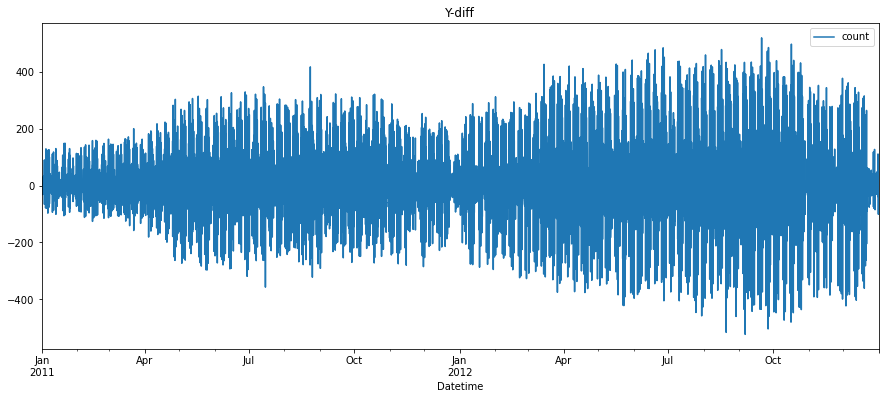

In [18]:
# Y diff
df[['count']].diff().plot(kind='line', figsize=(15,6))
plt.title('Y-diff')
plt.show()

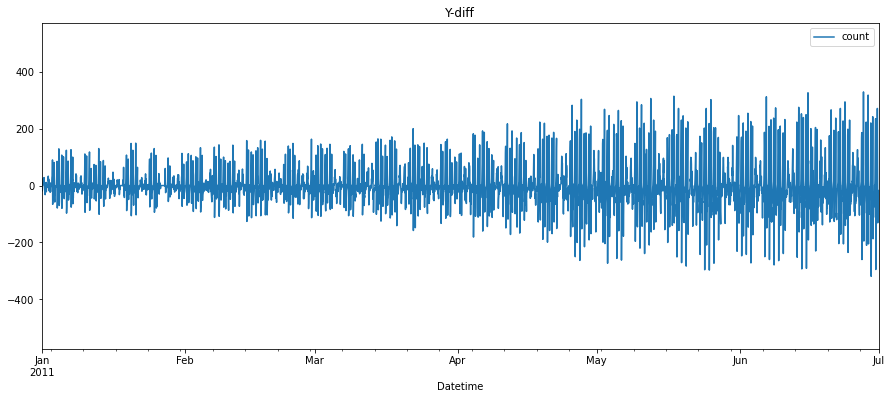

In [19]:
# Y diff
df[['count']].diff().plot(kind='line', figsize=(15,6),xlim=('2011-01-01', '2011-07-01'))
plt.title('Y-diff')
plt.show()

In [20]:
# y diff feature
Y_diff = df[['count']].diff()
Y_diff.fillna(method='ffill', inplace=True)
Y_diff.fillna(method='bfill', inplace=True)
Y_diff.columns = ['count_diff']

df = pd.concat([df, Y_diff], axis=1)

In [21]:
# datetime feature
df['Year'] = df.datetime.dt.year
df['Quater'] = df.datetime.dt.quarter
df['Month'] = df.datetime.dt.month
df['DayofWeek'] = df.datetime.dt.dayofweek
df['Day'] = df.datetime.dt.day
df['Hour'] = df.datetime.dt.hour

### Time lag
- Lagged variable 
- 시차를 두고 효과가 발생한다는 가정하에 변수의 지연값을 생성


In [22]:
df['count_lag1'] = df['count'].shift(1)
df['count_lag2'] = df['count'].shift(2)
df['count_lag1'].fillna(method='bfill', inplace=True)
df['count_lag2'].fillna(method='bfill', inplace=True)

In [23]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,count_trend,count_seasonal,count_Day,count_Week,count_diff,Year,Quater,Month,DayofWeek,Day,Hour,count_lag1,count_lag2
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,41.06,-134.25,41.04,56.11,24.00,2011,1,1,5,1,0,16.00,16.00
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,41.06,-154.75,41.04,56.11,24.00,2011,1,1,5,1,1,16.00,16.00
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,41.06,-165.27,41.04,56.11,-8.00,2011,1,1,5,1,2,40.00,16.00
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,41.06,-176.48,41.04,56.11,-19.00,2011,1,1,5,1,3,32.00,40.00
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,41.06,-181.67,41.04,56.11,-12.00,2011,1,1,5,1,4,13.00,32.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,2012-12-31 19:00:00,1,0,1,2,10.66,12.88,60,11.00,11,108,119,113.71,122.70,110.17,73.30,-3.00,2012,4,12,0,31,19,122.00,164.00
2012-12-31 20:00:00,2012-12-31 20:00:00,1,0,1,2,10.66,12.88,60,11.00,8,81,89,113.71,37.48,110.88,73.70,-30.00,2012,4,12,0,31,20,119.00,122.00
2012-12-31 21:00:00,2012-12-31 21:00:00,1,0,1,1,10.66,12.88,60,11.00,7,83,90,113.71,-16.10,112.67,74.10,1.00,2012,4,12,0,31,21,89.00,119.00


## Date set 분리 - 시계열
- Random (X)
- 과거부터 순서대로 train, validation, test 순의 비율로 나눔
- 멀어질 수록 정화도가 떨어지는 경우를 대비해서 점진적인 방식으로 step 단위의 test set 지정
- '2012-07-01' 기준 설정

In [24]:
df_raw.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [25]:
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime','casual','registered']
X_colname = [x for x in df.columns if x not in Y_colname+X_remove]
len(X_colname)

21

In [26]:
# for a time-series
raw_train = df.loc[df.index < '2012-07-01',:]
raw_test = df.loc[df.index >= '2012-07-01',:]
print(raw_train.shape, raw_test.shape)

(13128, 25) (4416, 25)


In [27]:
# data split of X and Y from train/test sets
Y_train = raw_train[Y_colname]
X_train = raw_train[X_colname]
Y_test = raw_test[Y_colname]
X_test = raw_test[X_colname]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(13128, 21) (13128, 1)
(4416, 21) (4416, 1)


## Evaluation metrics
- R-sqrared: 추정 모형이이 데이터에 적합된 정도, 모델에 의해 설명되는 데이터의 분산의 정도(%)
- MAE(Mean Avsolute Error): 
<center>$MAE = \dfrac{1}{n}$ $\sum\limits_{i=1}^{n} |y_i - \hat{y}_i|$</center>
- MSE(Mean Squared Error):
<center>$MSE = \dfrac{1}{n}$ $\sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$</center>
- MSLE: MSE 유사, Weight를 부여하는 지표, Exponential 추세가 있는 데이터에서 활용
<center>$MSLE = \dfrac{1}{n}$ $\sum\limits_{i=1}^{n} (log(1+y_i) - log(1+\hat{y}_i))^2$</center>
- MedAE: Robust한 성능지표
<center>$MedAE = median(|y_1 - \hat{y}_1|, |y_2 - \hat{y}_2|, ... , |y_n - \hat{y}_n|)$</center>
- RMSE: MSE의 제곱값 보정
<center>$RMSE = \sqrt{MSE}$</center>
- MAPE: MAE 유사, %형식 표시
<center>$MAPE = \dfrac{100}{n}$ $\sum\limits_{i=1}^{n} \dfrac{|y_i - \hat{y}_i|}{y_i}$</center>
- MPE: MAPE 유사, (+/-)까지 표시
<center>$MPE = \dfrac{100}{n}$ $\sum\limits_{i=1}^{n} \dfrac{y_i - \hat{y}_i}{y_i}$</center>

In [28]:
# LinearRegression (using statsmodels)
fit_reg1 = sm.OLS(Y_train, X_train).fit()
display(fit_reg1.summary())
pred_tr_reg1 = fit_reg1.predict(X_train).values
pred_te_reg1 = fit_reg1.predict(X_test).values

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.620e+08
Date:                Sun, 17 Jan 2021   Prob (F-statistic):                        0.00
Time:                        17:43:00   Log-Likelihood:                          1906.0
No. Observations:               13128   AIC:                                     -3770.
Df Residuals:                   13107   BIC:                                     -3613.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
season            -0.0008      0.004     -0.216      0.829      -0.008       0.007
holiday            0.0081      0.014      0.595      0.552      -0.018       0.035
workingday         0.0079      0.007      1.182      0.237      -0.005       0.021
weather            0.0042      0.003      1.236      0.217      -0.002       0.011
temp               0.0026      0.002      1.323      0.186      -0.001       0.006
atemp             -0.0027      0.002     -1.477      0.140      -0.006       0.001
humidity       -9.588e-05      0.000     -0.799      0.424      -0.000       0.000
windspeed          0.0003      0.000      1.026      0.305      -0.000       0.001
count_trend     9.426e-05   8.41e-05      1.120      0.263   -7.06e-05       0.000
count_seasonal  1.915e-05   2.56e-05      0.749      0.454   -3.09e-05    6.92e-05
count_Day       3.905e-05   8.35e-05      0.468      0.640      -0.000       0.000
count_Week     -2.844e-05   7.33e-05     -0.388      0.698      -0.000       0.000
count_diff         1.0000    2.9e-05   3.45e+04      0.000       1.000       1.000
Year           -1.425e-05   7.61e-06     -1.873      0.061   -2.92e-05    6.66e-07
Quater            -0.0028      0.008     -0.365      0.715      -0.018       0.012
Month              0.0021      0.002      0.930      0.352      -0.002       0.007
DayofWeek          0.0004      0.002      0.233      0.816      -0.003       0.003
Day                0.0004      0.000      1.670      0.095   -6.09e-05       0.001
Hour               0.0005      0.000      1.524      0.128      -0.000       0.001
count_lag1         1.0000    2.7e-05    3.7e+04      0.000       1.000       1.000
count_lag2     -1.994e-05   2.58e-05     -0.772      0.440   -7.06e-05    3.07e-05
==============================================================================
Omnibus:                    54426.860   Durbin-Watson:                   1.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      93563547540.065
Skew:                        -114.260   Prob(JB):                         0.00
Kurtosis:                   13079.556   Cond. No.                     1.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

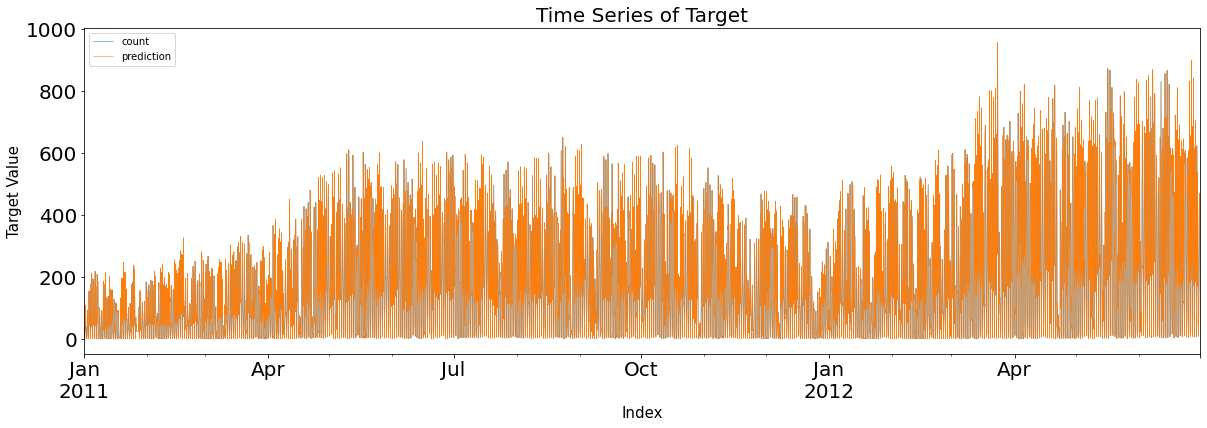

In [29]:
pd.concat([Y_train, pd.DataFrame(pred_tr_reg1, index=Y_train.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                               xlim=(Y_train.index.min(),Y_train.index.max()),
                                                                                                               linewidth=0.5, fontsize=20)
plt.title('Time Series of Target', fontsize=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Target Value', fontsize=15)
plt.show()

In [30]:
MAE = abs(Y_train.values.flatten() - pred_tr_reg1).mean()
MSE = ((Y_train.values.flatten() - pred_tr_reg1)**2).mean()
MAPE = (abs(Y_train.values.flatten() - pred_tr_reg1)/Y_train.values.flatten()*100).mean()

Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
Residual = pd.DataFrame(Y_train.values.flatten() - pred_tr_reg1, index=Y_train.index, columns=['Error'])

pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T

,MAE,MSE,MAPE
Score,0.01,0.04,0.06


## Desiduals Diagnostics

- 잔차에 상관 관계가 없음
- 잔차의 평균 0
- 잔차가 정규 분포를 따름

`ADF(정상성)`
- adfuller()  

`KPSS(비정상성)`
- kpss()  

`Normality(정규분포)`
- shapiro()  

`Autocorrelation(자기상관)`
- lag_plot()  

`Heteroscedasticity(등분산성)`
- het_goldfeldquandt()  

In [31]:
### Functionalize
### Error analysis
def stationarity_adf_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data)[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data)[4].items():
            Stationarity_adf['Critical Value(%s)'%key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data)[5]
            Stationarity_adf = pd.DataFrame(Stationarity_adf, columns=['Stationarity_adf'])
    else:
        Stationarity_adf = pd.Series(sm.tsa.stattools.adfuller(Y_Data[Target_name])[0:4],
                                     index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
        for key, value in sm.tsa.stattools.adfuller(Y_Data[Target_name])[4].items():
            Stationarity_adf['Critical Value(%s)'%key] = value
            Stationarity_adf['Maximum Information Criteria'] = sm.tsa.stattools.adfuller(Y_Data[Target_name])[5]
            Stationarity_adf = pd.DataFrame(Stationarity_adf, columns=['Stationarity_adf'])
    return Stationarity_adf

def stationarity_kpss_test(Y_Data, Target_name):
    if len(Target_name) == 0:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data)[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data)[3].items():
            Stationarity_kpss['Critical Value(%s)'%key] = value
            Stationarity_kpss = pd.DataFrame(Stationarity_kpss, columns=['Stationarity_kpss'])
    else:
        Stationarity_kpss = pd.Series(sm.tsa.stattools.kpss(Y_Data[Target_name])[0:3],
                                      index=['Test Statistics', 'p-value', 'Used Lag'])
        for key, value in sm.tsa.stattools.kpss(Y_Data[Target_name])[3].items():
            Stationarity_kpss['Critical Value(%s)'%key] = value
            Stationarity_kpss = pd.DataFrame(Stationarity_kpss, columns=['Stationarity_kpss'])
    return Stationarity_kpss

def error_analysis(Y_Data, Target_name, X_Data, graph_on=False):
    for x in Target_name:
        Target_name = x
    X_Data = X_Data.loc[Y_Data.index]

    if graph_on == True:
        ##### Error Analysis(Plot)
        Y_Data['RowNum'] = Y_Data.reset_index().index

        # Stationarity(Trend) Analysis
        sns.set(palette="muted", color_codes=True, font_scale=1)
        sns.lmplot(x='RowNum', y=Target_name, data=Y_Data, fit_reg='True', line_kws={'color': 'red'}, size=5.2, aspect=2, ci=99, sharey=True)
        del Y_Data['RowNum']

        # Normal Distribution Analysis
        figure, axes = plt.subplots(figsize=(30,5))
        sns.distplot(Y_Data[Target_name], norm_hist='True', fit=stats.norm, ax=axes)

        # Lag Analysis
        length = int(len(Y_Data[Target_name])/10)
        figure, axes = plt.subplots(1, 4, figsize=(12,3))
        pd.plotting.lag_plot(Y_Data[Target_name], lag=1, ax=axes[0])
        pd.plotting.lag_plot(Y_Data[Target_name], lag=5, ax=axes[1])
        pd.plotting.lag_plot(Y_Data[Target_name], lag=10, ax=axes[2])
        pd.plotting.lag_plot(Y_Data[Target_name], lag=50, ax=axes[3])

        # Autocorrelation Analysis
        figure, axes = plt.subplots(2,1,figsize=(12,5))
        sm.tsa.graphics.plot_acf(Y_Data[Target_name], lags=100, use_vlines=True, ax=axes[0])
        sm.tsa.graphics.plot_pacf(Y_Data[Target_name], lags=100, use_vlines=True, ax=axes[1])

    ##### Error Analysis(Statistics)
    # Checking Stationarity
    # Null Hypothesis: The Time-series is non-stationalry
    Stationarity_adf = stationarity_adf_test(Y_Data, Target_name)
    Stationarity_kpss = stationarity_kpss_test(Y_Data, Target_name)

    # Checking of Normality
    # Null Hypothesis: The residuals are normally distributed
    Normality = pd.DataFrame([stats.shapiro(Y_Data[Target_name])],
                             index=['Normality'], columns=['Test Statistics', 'p-value']).T

    # Checking for Autocorrelation
    # Null Hypothesis: Autocorrelation is absent
    Autocorrelation = pd.concat([pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Y_Data[Target_name], lags=[1,5,10,50])[0], columns=['Test Statistics']),
                                 pd.DataFrame(sm.stats.diagnostic.acorr_ljungbox(Y_Data[Target_name], lags=[1,5,10,50])[1], columns=['p-value'])], axis=1).T
    Autocorrelation.columns = ['Autocorr(lag1)', 'Autocorr(lag5)', 'Autocorr(lag10)', 'Autocorr(lag50)']

    # Checking Heteroscedasticity
    # Null Hypothesis: Error terms are homoscedastic
    Heteroscedasticity = pd.DataFrame([sm.stats.diagnostic.het_goldfeldquandt(Y_Data[Target_name], X_Data.values, alternative='two-sided')],
                                      index=['Heteroscedasticity'], columns=['Test Statistics', 'p-value', 'Alternative']).T
    Score = pd.concat([Stationarity_adf, Stationarity_kpss, Normality, Autocorrelation, Heteroscedasticity], join='inner', axis=1)
    index_new = ['Test Statistics', 'p-value', 'Alternative', 'Used Lag', 'Used Observations',
                 'Critical Value(1%)', 'Critical Value(5%)', 'Critical Value(10%)', 'Maximum Information Criteria']
    Score.reindex(index_new)
    return Score
# error_analysis(Resid_tr_reg1[1:], ['Error'], X_train, graph_on=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

,Stationarity_adf,Stationarity_kpss,Normality,Autocorr(lag1),Autocorr(lag5),Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,-10.04,0.09,0.01,0.00,0.01,0.03,0.09,0.00
p-value,0.00,0.10,0.00,0.98,1.00,1.00,1.00,0.00


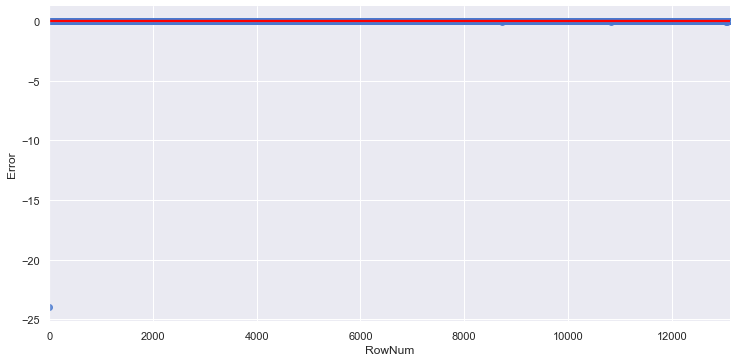

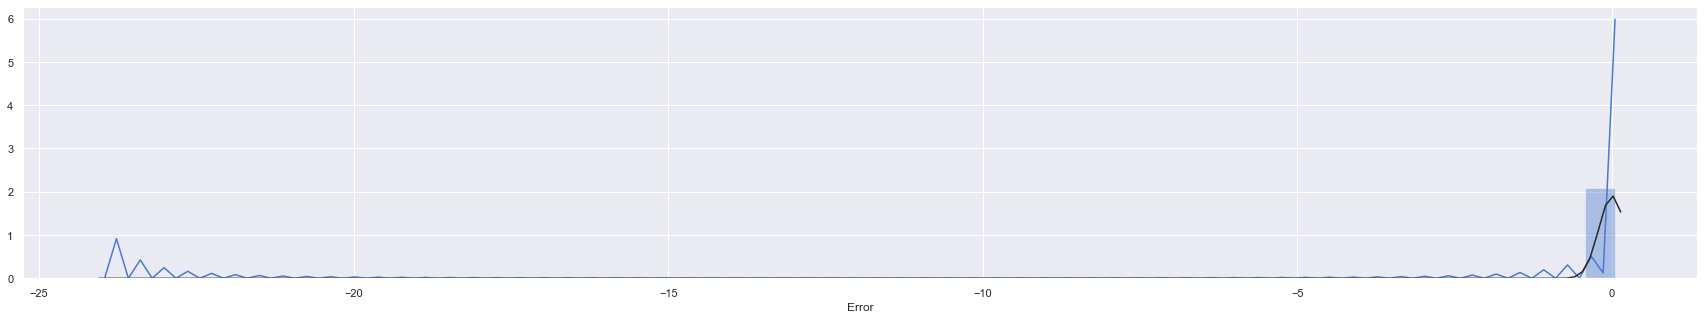

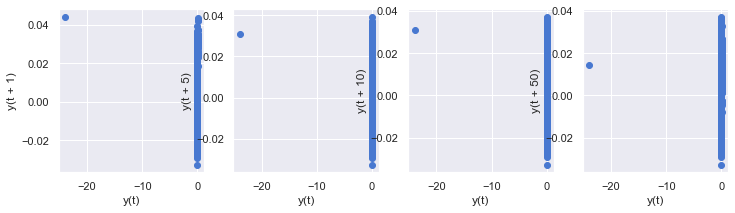

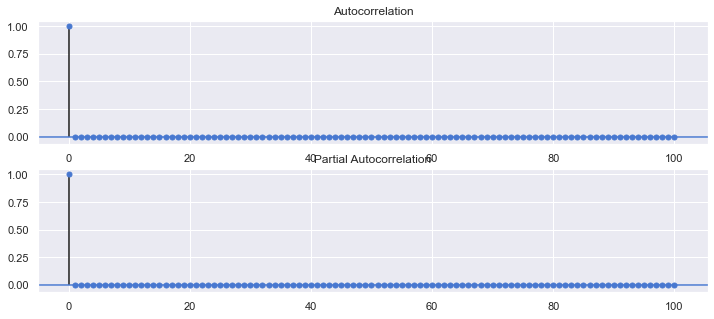

In [32]:
error_analysis(Residual, ['Error'], X_train, graph_on=True)
# 정산성 / 비정규분포 / 자기상관X / 등분산X

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

,Stationarity_adf,Stationarity_kpss,Normality,Autocorr(lag1),Autocorr(lag5),Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,-10.11,8.07,1.00,"9,511.46","32,085.22","45,289.95","109,731.65",1.47
p-value,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00


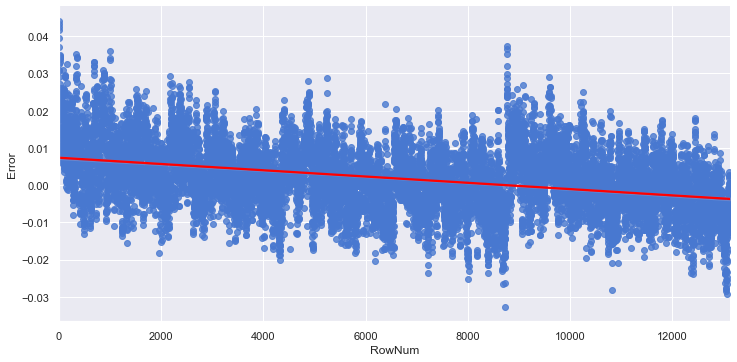

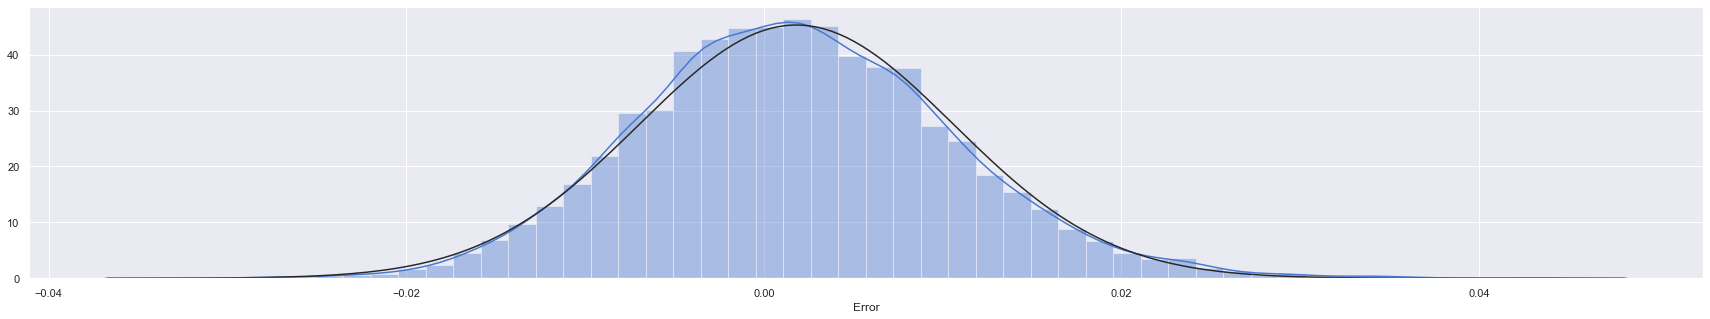

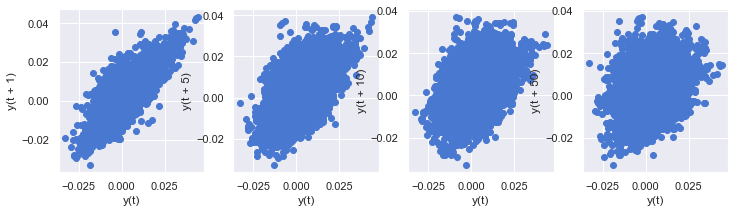

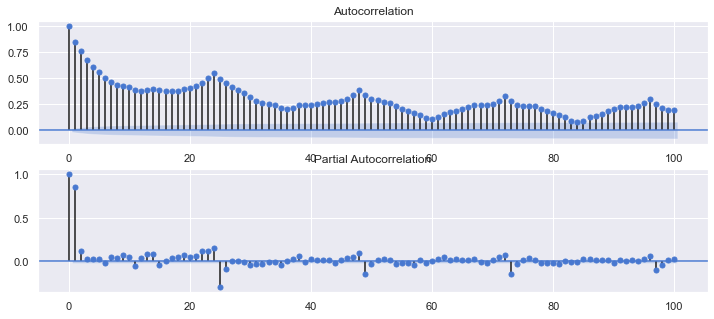

In [33]:
error_analysis(Residual[1:], ['Error'], X_train, graph_on=True)
# 정상성 / 비정상성 / 비정규분포 / 자기상관O / 등분산X

### DF_raw test

(13003, 12) (4376, 12)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  count   R-squared (uncentered):                   0.640
Model:                            OLS   Adj. R-squared (uncentered):              0.639
Method:                 Least Squares   F-statistic:                              2884.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):                        0.00
Time:                        17:43:09   Log-Likelihood:                         -82656.
No. Observations:               13003   AIC:                                  1.653e+05
Df Residuals:                   12995   BIC:                                  1.654e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season         3.3887      1.292      2.624      0.009       0.857       5.920
holiday       -8.0697      7.680     -1.051      0.293     -23.124       6.985
workingday     9.2372      2.664      3.467      0.001       4.015      14.459
weather        7.7108      2.116      3.644      0.000       3.563      11.858
temp          -7.6565      1.231     -6.219      0.000     -10.070      -5.243
atemp         15.8602      1.105     14.360      0.000      13.695      18.025
humidity      -1.7361      0.064    -27.166      0.000      -1.861      -1.611
windspeed      2.4002      0.138     17.425      0.000       2.130       2.670
==============================================================================
Omnibus:                     2149.919   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3891.560
Skew:                           1.053   Prob(JB):                         0.00
Kurtosis:                       4.657   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

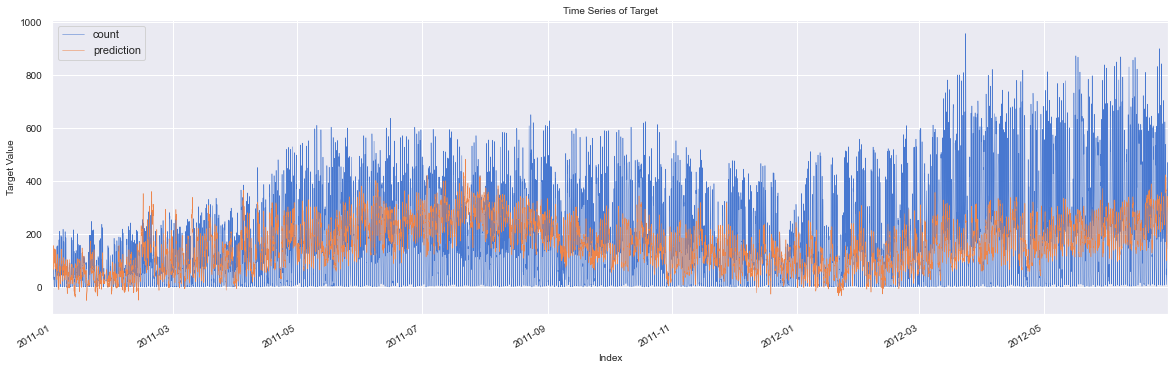

In [34]:
# Confirm of input and output
Y_colname = ['count']
X_remove = ['datetime', 'DateTime','casual','registered']
X_colname = [x for x in df_raw.columns if x not in Y_colname+X_remove]

# for a time-series
raw_train = df_raw.loc[df_raw.index < '2012-07-01',:]
raw_test =df_raw.loc[df_raw.index >= '2012-07-01',:]
print(raw_train.shape, raw_test.shape)

# data split of X and Y from train/test sets
Y_train = raw_train[Y_colname]
X_train = raw_train[X_colname]
Y_test = raw_test[Y_colname]
X_test = raw_test[X_colname]

fit_reg = sm.OLS(Y_train, X_train).fit()
display(fit_reg.summary())
pred_tr_reg = fit_reg.predict(X_train).values
pred_re_reg = fit_reg.predict(X_test).values

pd.concat([Y_train, pd.DataFrame(pred_tr_reg, index=Y_train.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                               xlim=(Y_train.index.min(),Y_train.index.max()),
                                                                                                               linewidth=0.5, fontsize=10)
plt.title('Time Series of Target', fontsize=10)
plt.xlabel('Index', fontsize=10)
plt.ylabel('Target Value', fontsize=10)
plt.show()


In [35]:
MAE = abs(Y_train.values.flatten() - pred_tr_reg).mean()
MSE = ((Y_train.values.flatten() - pred_tr_reg)**2).mean()
MAPE = (abs(Y_train.values.flatten() - pred_tr_reg)/Y_train.values.flatten()*100).mean()

Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
Residual = pd.DataFrame(Y_train.values.flatten() - pred_tr_reg, index=Y_train.index, columns=['Error'])

pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T


,MAE,MSE,MAPE
Score,103.53,"19,449.17",448.00


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

,Stationarity_adf,Stationarity_kpss,Normality,Autocorr(lag1),Autocorr(lag5),Autocorr(lag10),Autocorr(lag50),Heteroscedasticity
Test Statistics,-9.13,11.30,0.94,"8,099.05","12,265.48","12,934.61","47,366.86",1.77
p-value,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00


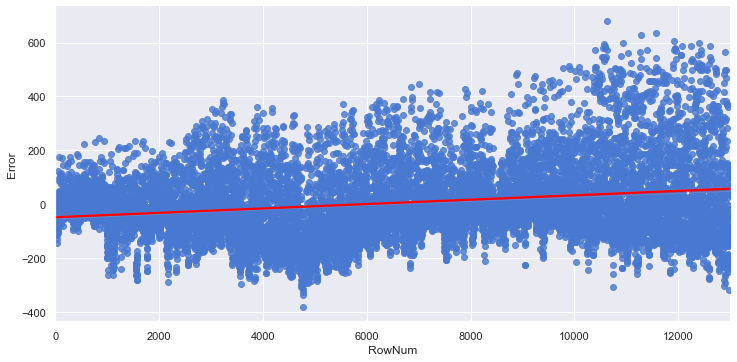

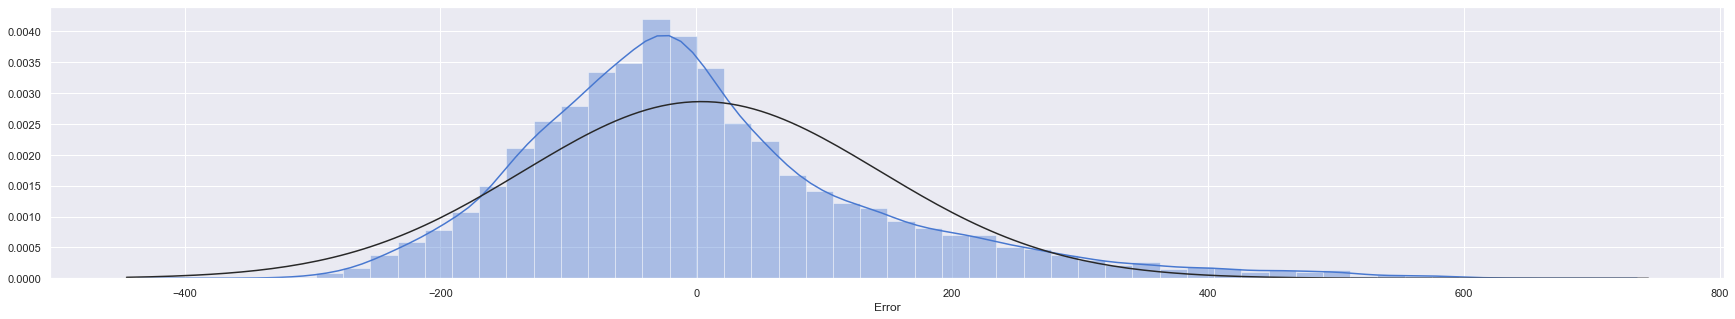

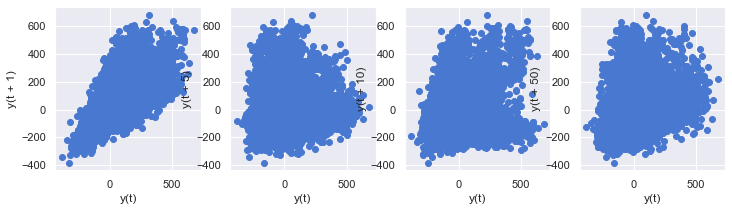

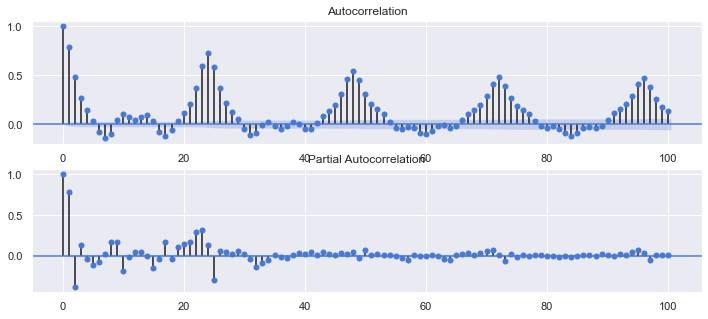

In [36]:
error_analysis(Residual, ['Error'], X_train, graph_on=True)
# 정상성 / 비정상성 / 비정규분포 / 자기상관O / 등분산X